---
title: "Ejemplos 9. Diferenciación e integración numérica"
format: 
  html:
    grid: 
      body-width: 1200px
editor: visual
execute: 
  keep-ipynb: true
jupyter: python3
---


Packages requeridos:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Para instalar plotly hay que escribir en la terminal: py -m pip install plotly
import plotly.graph_objects as go
from scipy.differentiate import derivative
#Para instalar numdifftools hay que escribir en la terminal: py -m pip install numdifftools
import numdifftools as nd
from scipy.stats import norm
from scipy import integrate

# Ejemplo 1

Aproximar la derivada de la función $f(x) = xe^x$ en el intervalo $[-1, 1]$ con la fórmula del punto medio de tres puntos para tamaños de paso $h=0.1$ y $h=0.25$

Inicialmente definimos una función con la fórmula del punto medio de tres puntos:


In [2]:
def myder_3p(x, h):
  myder = (f(x+h)-f(x-h))/(2*h)
  return(myder)

Definimos la función $f(x) = xe^x$ y la derivada $f'(x) = xe^x+e^x$ para compararla con las aproximaciones en una gráfica.


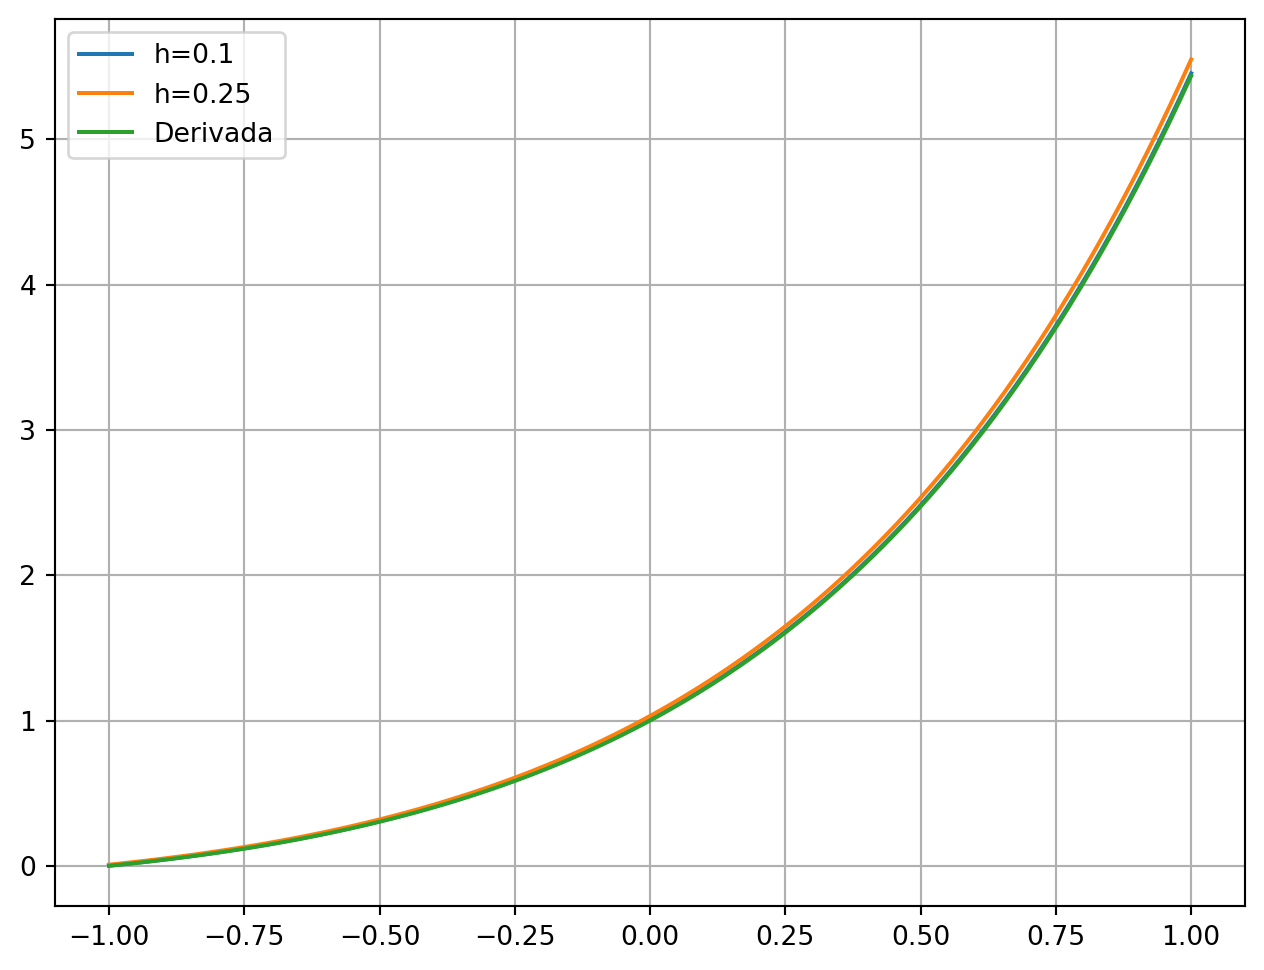

In [3]:
#| code-fold: true
#| fig-align: 'center'

f= lambda x: x*np.exp(x)
derf = lambda x: x*np.exp(x)+np.exp(x)

x_values = np.linspace(-1, 1, 100)

plt.figure(figsize=(8,6))
plt.plot(x_values,  myder_3p(x_values, 0.1), label="h=0.1")
plt.plot(x_values,  myder_3p(x_values, 0.25), label="h=0.25")
plt.plot(x_values,derf(x_values), label="Derivada")
plt.grid()
plt.legend()
plt.show()

Dado que las gráficas se superponen, es conveniente utilizar una gráfica con plotly.


In [4]:
#| code-fold: true


fig = go.Figure()

fig.add_trace(go.Scatter(x= x_values, y= myder_3p(x_values, 0.1), mode='lines', name='h=0.1', line=dict(color='teal', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= myder_3p(x_values, 0.25), mode='lines', name='h=0.25', line=dict(color='royalblue', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= derf(x_values), mode='lines', name='Derivada', line=dict(color='goldenrod', width=1)))

# Configurar diseño de la gráfica
fig.update_layout(
    title="Gráfica de aproximación de las derivadas",
    xaxis_title="x",
    yaxis_title="y",
    template="plotly_white"
)

fig.show()

Ahora se grafica el valor absoluto de los errores para cada tamaño de paso.


In [5]:
#| code-fold: true


fig = go.Figure()

fig.add_trace(go.Scatter(x= x_values, y= abs(derf(x_values)-myder_3p(x_values, 0.1)), mode='lines', name='h=0.1', line=dict(color='teal', width=2)))
fig.add_trace(go.Scatter(x= x_values, y= abs(derf(x_values)-myder_3p(x_values, 0.25)), mode='lines', name='h=0.25', line=dict(color='royalblue', width=2)))


# Configurar diseño de la gráfica
fig.update_layout(
    title="Gráfica de errores (valor absoluto)",
    xaxis_title="x",
    yaxis_title="y",
    template="plotly_white"
)

fig.show()

En la tarea utilizaremos las funciones:

* `nd.Derivative` del package [numdifftools](@https://numdifftools.readthedocs.io/en/master/reference/numdifftools.html#numdifftools.nd_algopy.Derivative). Donde están implementados los métodos que vimos en clase y además se pueden calcular las derivadas de orden superior.

* `np.gradient` del package [numpy](@https://numpy.org/doc/stable/reference/generated/numpy.gradient.html). Esta función es adecuada para aproximar la derivada cuando sólo tenemos parejas ordenadas $(x_0, y_0), (x_1, y_1), \dots (x_n, y_n)$, es decir, no se cuenta con la expresión de la función $f$. 

* `derivative` de [Scipy](@https://docs.scipy.org/doc/scipy-1.15.2/reference/generated/scipy.differentiate.derivative.html). Una de las particularidades del algoritmo implementado en esta función es que adapta el tamaño de paso (con el argumento `step_factor`). El argumento `order` corresponde al orden de convergencia (el exponente de $h$ en los términos de error), es decir, no se refiere a una derivada de orden superior.


In [6]:
#| code-fold: true
#| fig-align: 'center'

# Función de numdifftools
df_01 = nd.Derivative(f, step=0.1, method='central', order=2)
df_025 = nd.Derivative(f, step=0.25, method='central', order=2)

fig = go.Figure()
fig.add_trace(go.Scatter(x= x_values, y= df_01(x_values), mode='lines', name='h=0.1', line=dict(color='teal', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= df_025(x_values), mode='lines', name='h=0.25', line=dict(color='royalblue', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= np.gradient(f(x_values), x_values, edge_order=2), mode='lines', name='np.gradient', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= derivative(f, x_values).df, mode='lines', name='SciPy', line=dict(color='aqua', width=2)))
fig.add_trace(go.Scatter(x= x_values, y= derf(x_values), mode='lines', name='Derivada', line=dict(color='goldenrod', width=1)))

# Configurar diseño de la gráfica
fig.update_layout(
    title="Gráfica de aproximación de las derivadas",
    xaxis_title="x",
    yaxis_title="y",
    template="plotly_white",
    width = 768,
    height = 576
)

fig.show(align= 'center')

Consideremos la función $f(x)=xsen(x)+x^2cos(x)$ calcular la derivada en el intervalo $[a,b]$


In [7]:
#| code-fold: true

f = lambda x: x*np.sin(x) + x ** 2 * np.cos(x)
derf = lambda x: 3*x*np.cos(x) + np.sin(x)*(1-x**2)

a = 0 
b= 2* np.pi

df_01 = nd.Derivative(f, step=0.1, method='central', order=2)
df_025 = nd.Derivative(f, step=0.25, method='central', order=2)
fig = go.Figure()

x_values = np.linspace(a, b, 500)

fig.add_trace(go.Scatter(x= x_values, y= df_025(x_values), mode='lines', name='h=0.25', line=dict(color='royalblue', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= df_01(x_values), mode='lines', name='h=0.1', line=dict(color='teal', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= np.gradient(f(x_values), x_values, edge_order=2), mode='lines', name='np.gradient', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= derivative(f, x_values).df, mode='lines', name='SciPy', line=dict(color='aqua', width=2)))
fig.add_trace(go.Scatter(x= x_values, y= derf(x_values), mode='lines', name='Derivada', line=dict(color='goldenrod', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= f(x_values), mode='lines', name='Función', line=dict(color='firebrick', width=2.5)))

# Configurar diseño de la gráfica
fig.update_layout(
    title="Gráfica de aproximación de las derivadas",
    xaxis_title="x",
    yaxis_title="y",
    template="plotly_white"
)

fig.show()

In [8]:
#| code-fold: true

fig = go.Figure()

fig.add_trace(go.Scatter(x= x_values, y= abs(derf(x_values)-df_025(x_values)), mode='lines', name='h=0.25', line=dict(color='royalblue', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= abs(derf(x_values)-df_01(x_values)), mode='lines', name='h=0.1', line=dict(color='teal', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= abs(derf(x_values)-np.gradient(f(x_values), x_values, edge_order=2)), mode='lines', name='np.gradient', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x= x_values, y= abs(derf(x_values)-derivative(f, x_values).df), mode='lines', name='SciPy', line=dict(color='aqua', width=2)))


# Configurar diseño de la gráfica
fig.update_layout(
    title="Gráfica de errores",
    xaxis_title="x",
    yaxis_title="y",
    template="plotly_white"
)

fig.show()

Gráfica preliminar de la integral de la función $f(x)=xe^x$


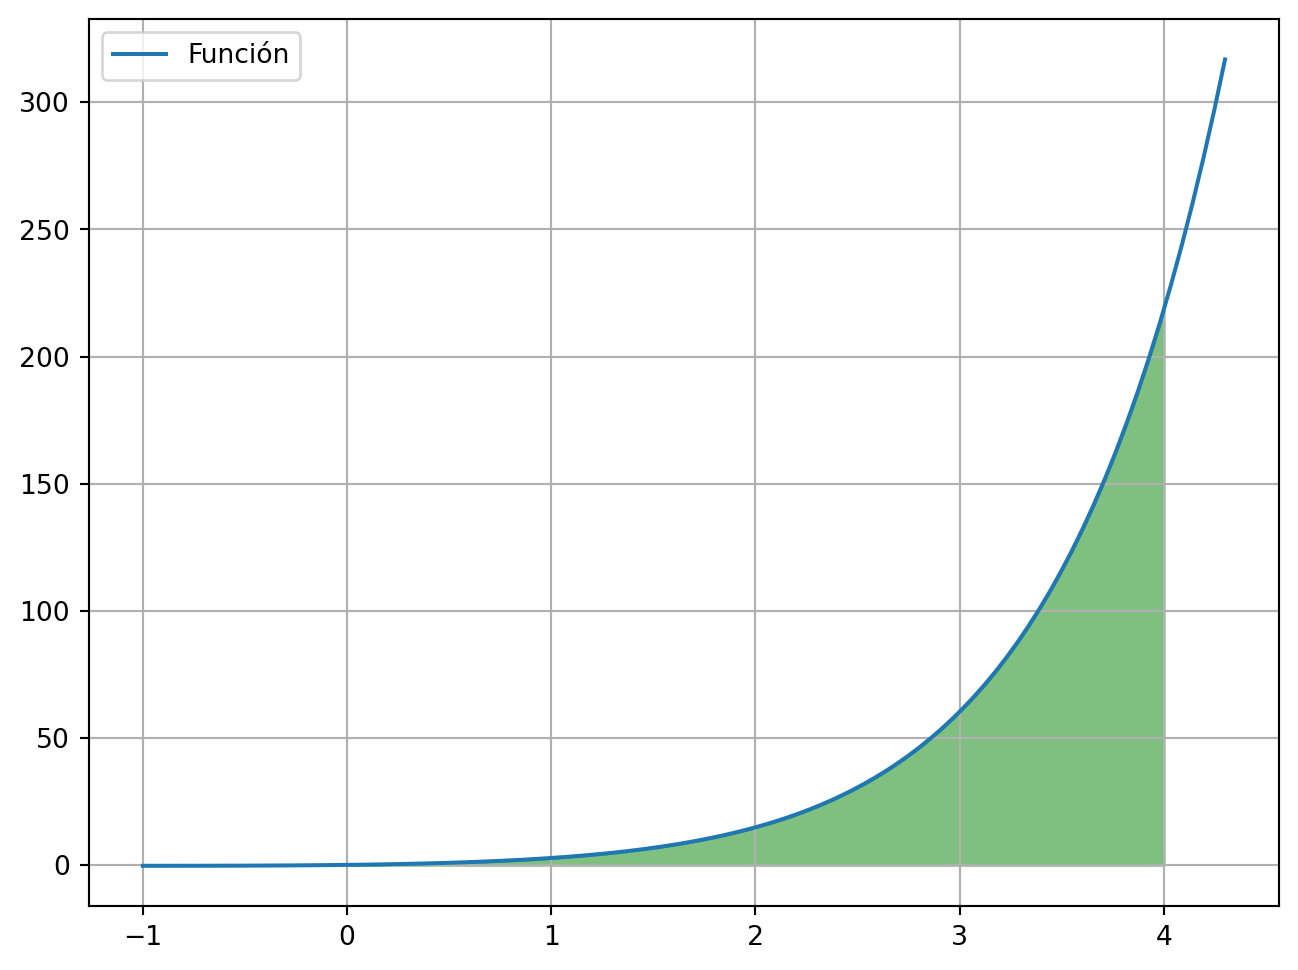

In [9]:
#| code-fold: true

f= lambda x: x*np.exp(x)
a = 0
b = 4


x_values = np.linspace(-1, 4.3, 100)


plt.figure(figsize=(8,6))
plt.plot(x_values,f(x_values), label="Función")
plt.fill_between(np.linspace(a,b, 100), y1=0, y2=f(np.linspace(a,b, 100)), color="green", alpha=0.5)
plt.grid()
plt.legend()
plt.show()


In [10]:
int_exacta = 3 * np.exp(4)+1
int_exacta


def int_simpson(a,b,f):
  x0 =a
  x2 =b
  h = (b-a)/2
  x1 =x0 +h
  int_approx = h/3*(f(x0)+4*f(x1)+f(x2))
  return(int_approx)
  
  
  
int_h2= int_simpson(0, 4, f)
int_h2
new_approx = int_simpson(0, 1, f)+int_simpson(1, 2, f)+int_simpson(2, 3, f)+ int_simpson(3, 4, f)
new_approx


from scipy import integrate
integrate.quad(f, 0, 4)

(164.79445009943274, 1.8295859283083163e-12)